In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import glob
import cPickle as pickle

In [4]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [5]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [39]:
RESULTS_DIR2 = '/n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH//'

In [6]:
for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure3.data_to_piechart'):
#     print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir)), os.listdir(subdir)
        
        classifier = subdir.split('/')[-1]
        dataset = subdir.split('/')[-2]
        experiment = subdir.split('/')[-3]
        
        print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [7]:
for subdir, _, _ in os.walk(RESULTS_DIR+'C.Figure3.data_to_barchart'):
#     print subdir
    if len(subdir.split('/')) == 8:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [56]:
experiment = 'C.Figure3.data_to_barchart'
e_dir = os.path.join(RESULTS_DIR, experiment)
e2_dir = os.path.join(RESULTS_DIR2, experiment)
datasets = sorted(os.listdir(e_dir))

bar_stats = [None]*6

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    bar_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    bar_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])
classifiers2 = ['VGG19', 'XCEPTION']
for i,c in enumerate(classifiers2):
    
    bar_stats[i+4] = []
    c_dir = os.path.join(e2_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    bar_stats[i+4].append(stats_per_c)


In [57]:
len(bar_stats[4][0])

4

In [60]:
experiment = 'C.Figure3.data_to_piechart'
e_dir = os.path.join(RESULTS_DIR, experiment)
e2_dir = os.path.join(RESULTS_DIR2, experiment)
datasets = sorted(os.listdir(e_dir))

pie_stats = [None]*6

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    pie_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    pie_stats[i].append(stats_per_c)
            
classifiers2 = ['VGG19', 'XCEPTION']
for i,c in enumerate(classifiers2):
    
    pie_stats[i+4] = []
    c_dir = os.path.join(e2_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    pie_stats[i+4].append(stats_per_c)
        
        
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [67]:
len(bar_stats[4])

1

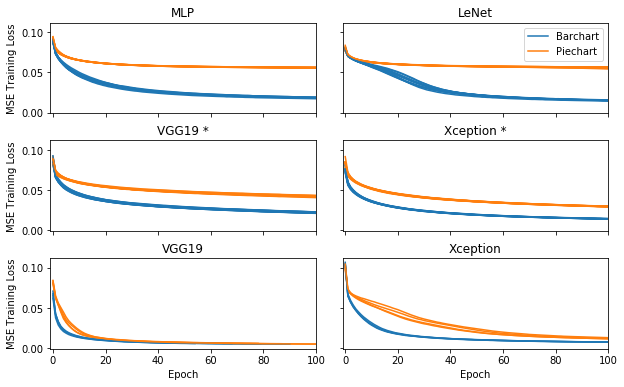

In [85]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], hspace=.3, wspace=.1)

axes = [None]*6

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1 or i==3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[i].get_yticklabels(), visible=False)
        plt.setp(axes[i].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2 or i == 4:
        
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        

        if i == 2:
            plt.setp(axes[i].get_xticklabels(), visible=False)  
        
        
        plt.ylabel('MSE Training Loss')
        if i!=2:
            plt.xlabel('Epoch')                
    elif i == 5:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[5].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[i][0])):
        
        # grab sample from both
#         print i,#bar_stats[i]
        if len(bar_stats[i][0])>0:
            bar_loss = bar_stats[i][0][sample]['loss']
        else:
            bar_loss = [0]
        if len(pie_stats[i][0])>0:
            pie_loss = pie_stats[i][0][sample]['loss']
        else:
            pie_loss = [0]
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Barchart', color='C0')
            plot(pie_loss, label='Piechart', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(pie_loss, color='C1')
            
    plt.xlim(-1,100)
    
    if i == 2:
        c = 'VGG19 *'
    elif i == 3:
        c = 'Xception *'
    elif i == 5:
        c = 'Xception'
    
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure3_loss.pdf')

In [28]:
bar_stats[i]

[[]]

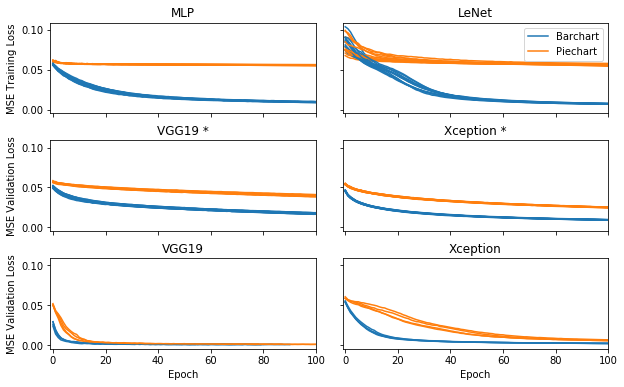

In [122]:
from matplotlib import gridspec

bar_losses = []
pie_losses = []

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], hspace=.3, wspace=.1)

axes = [None]*6

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1 or i==3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[i].get_yticklabels(), visible=False)
        plt.setp(axes[i].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2 or i == 4:
        
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        

        if i == 2:
            plt.setp(axes[i].get_xticklabels(), visible=False)  
        
        
        plt.ylabel('MSE Validation Loss')
        if i!=2:
            plt.xlabel('Epoch')                
    elif i == 5:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[5].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[i][0])):
        
        # grab sample from both
#         print i,#bar_stats[i]
        if len(bar_stats[i][0])>0:
            bar_loss = bar_stats[i][0][sample]['val_loss']
        else:
            bar_loss = [0]
        if len(pie_stats[i][0])>0:
            pie_loss = pie_stats[i][0][sample]['val_loss']
        else:
            pie_loss = [0]
            
        bar_losses.append(bar_loss)
        pie_losses.append(pie_loss)
            
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Barchart', color='C0')
            plot(pie_loss, label='Piechart', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(pie_loss, color='C1')
            
    plt.xlim(-1,100)
    
    if i == 2:
        c = 'VGG19 *'
    elif i == 3:
        c = 'Xception *'
    elif i == 5:
        c = 'Xception'
    
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure3_val_loss.pdf', bbox_inches='tight', pad_inches=0)

In [106]:
from pyvttbl import DataFrame
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [118]:
# let's do up to 20 epochs
pie_losses_upto_20 = []
for p in pie_losses:
    pie_losses_upto_20 += p[0:20]
bar_losses_upto_20 = []
for b in bar_losses:
    bar_losses_upto_20 += b[0:20]

In [121]:

df = DataFrame()
df['data'] = pie_losses_upto_20 + bar_losses_upto_20
df['conditions'] = ['Pie Chart']*len(pie_losses)*20 + ['Bar Chart']*len(bar_losses)*20

aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

# # Welch's t-test

# t, p = ttest_ind(all_e, human, equal_var=False)
# print c,' vs. Human', t,p

Anova: Single Factor on data

SUMMARY
 Groups     Count    Sum     Average   Variance  
Bar Chart    1120   41.610     0.037   3.104e-04 
Pie Chart    1120   58.569     0.052   2.142e-04 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation      SS        df       MS         F       P-value    eta^2   Obs. power 
Treatments            5.185e-06      1   5.185e-06   20.656   5.790e-06   0.009        0.995 
Error                 5.618e-04   2238   2.510e-07                                           
Total                 5.670e-04   2239                                                       

ANOVA
Source of Variation    SS      df       MS          F       P-value    eta^2   Obs. power 
Treatments            0.128      1       0.128   489.517   2.943e-98   0.179            1 
Error                 0.587   2238   2.623e-04                                            
Total                 0.715   2239                                                        

POSTHOC MULTIPLE COMPA

In [125]:
print np.mean(pie_losses_upto_20), np.std(pie_losses_upto_20)
print np.mean(bar_losses_upto_20), np.std(bar_losses_upto_20)

0.0522938114664 0.0146285302232
0.0371516804745 0.0176105963827


In [113]:
len(bar_losses[1])

209

In [112]:
len(bar_stats[0][0])

8

In [113]:
bar_stats[0][0][0]['MLAE']

2.4947385390539498

2 MLP
3 LeNet
4 VGG19 *
5 Xception *
6 VGG19
7 Xception
2 MLP
3 LeNet
4 VGG19 *
5 Xception *
6 VGG19
7 Xception


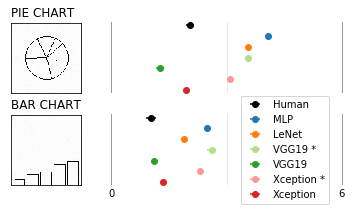

In [99]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []

titles = ['Pie Chart', 'Bar Chart']

#
# human values
#
human_values = [(2.05, 0.115),\
                (1.035, 0.125)]
human_values.append((np.mean([v[0] for v in human_values]), np.mean([v[1] for v in human_values])))



## data
no_samples = len(bar_stats[0][0])
bar_data = [None]*6
pie_data = [None]*6
classifiers = ['MLP', 'LeNet', 'VGG19 *', 'Xception *', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):

    bar_mlae_s = []
    pie_mlae_s = []
    
    for sample in range(len(bar_stats[i][0])):

        # grab sample from both
        bar_mlae = bar_stats[i][0][sample]['MLAE']
        pie_mlae = pie_stats[i][0][sample]['MLAE']
#         print i, sample, bar_mlae, pie_mlae
        bar_mlae_s.append(bar_mlae)
        pie_mlae_s.append(pie_mlae)
        
    bar_data[i] = bar_mlae_s
    pie_data[i] = pie_mlae_s
    
# swap vgg19 and xception *
pie_data[3], pie_data[4] = pie_data[4], pie_data[3]
bar_data[3], bar_data[4] = bar_data[4], bar_data[3]

all_data = [pie_data, bar_data]

## images
data, labels = C.Figure3.generate_datapoint()
bar_image = C.Figure3.data_to_barchart(data)
pie_image = C.Figure3.data_to_piechart(data)

bar_image = bar_image.astype(np.float32)
bar_image += np.random.uniform(0, 0.05,(100,100))

pie_image = pie_image.astype(np.float32)
pie_image += np.random.uniform(0, 0.05,(100,100))
images = [pie_image, bar_image]



fig = plt.figure(figsize=(6,3), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[.3,1], hspace=.3)

j = 0 # grid index (running)

rows = 2
for row in range(rows):
    
    for i, c in enumerate(['Image', 'Human']+classifiers):
        

        
        if i==0:
            # this is the image

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(titles[row].upper(), loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            ax.set_xticklabels('')
            ax.set_yticklabels('')
            
            plt.imshow(images[row], cmap='Greys', interpolation='none')
            
            continue

        #

#         if row == 0:
#             plt.title(c)

        if i==1:

            fig = plt.subplot(gs[j])
            j += 1
        
#             if row > 4:
#                 continue
        
            # this is human
            means = human_values[row][0]
            confidence = human_values[row][1]
            
            errorbars = plt.errorbar(means, 6-i, xerr=confidence, fmt='o',  color='black', label='Human')
            continue

    
        data = [all_data[row][i-2]]
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
        confidence = [1.96*np.std(r) for r in data]


        y_pos = 6-i#range(len(means))


        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # remove tick marks
        if row == 0:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        c_color = 'C'+str(i-2)
        print i, c
        if i == 4:
            # vgg19 imagenet
#             c = c+' *'
            c_color = '#b2df8a'
        elif i == 5:
            # vgg from scratch
#             c = c+'vg s'
            c = 'VGG19'
            c_color = 'C2'
        elif i == 6:
            # xcpetion imagenet
            c = 'Xception *'
            c_color = '#fb9a99'
        elif i == 7:
            # xception from scratch
#             c = c+'x sc'
#             c = 'Xception'
            c_color = 'C3'

        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', label=c, color=c_color)
plt.legend(loc='right', bbox_to_anchor=(0.95, 0.5))
plt.savefig('../PAPER/gfx/figure3_mlae_better_all.pdf', bbox_inches='tight', pad_inches=0)

In [131]:
pie = []
bar = []
for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'Xception *', 'VGG19', 'Xception']):
    pie += all_data[0][i]
    bar += all_data[1][i]

In [133]:
df = DataFrame()
df['data'] = pie+bar
df['conditions'] = ['Pie Chart']*len(pie) + ['Bar Chart']*len(bar)

aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

Anova: Single Factor on data

SUMMARY
 Groups     Count     Sum     Average   Variance 
Bar Chart      56   121.866     2.176      0.211 
Pie Chart      56   184.568     3.296      0.604 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation     SS     df     MS       F     P-value   eta^2   Obs. power 
Treatments             4.326     1   4.326   6.497     0.012   0.056        0.698 
Error                 73.247   110   0.666                                        
Total                 77.574   111                                                

ANOVA
Source of Variation     SS     df      MS       F       P-value    eta^2   Obs. power 
Treatments            35.103     1   35.103   86.061   1.776e-15   0.439        1.000 
Error                 44.868   110    0.408                                           
Total                 79.971   111                                                    

POSTHOC MULTIPLE COMPARISONS

Tukey HSD: Table of q-statistics
            Bar Cha

In [134]:
print np.mean(pie), np.std(pie)
print np.mean(bar), np.std(bar)

3.29585162512 0.770475887705
2.17617296117 0.455602337792


In [139]:
for i,c in enumerate(['MLP', 'LeNet', 'VGG19 *', 'VGG19', 'Xception *', 'Xception']):
    
    print '--'*80
    print c
    pie = all_data[0][i]
    bar = all_data[1][i]
    print 'pie', '$',np.round(np.mean(pie),3),'$ ($SD=', np.round(np.std(pie),3),'$)'
    print 'bar', '$',np.round(np.mean(bar),3),'$ ($SD=', np.round(np.std(bar),3),'$)'
    df = DataFrame()
    df['data'] = pie+bar
    df['conditions'] = ['Pie Chart']*len(pie) + ['Bar Chart']*len(bar)

    aov_pyvttbl = df.anova1way('data', 'conditions')
    print aov_pyvttbl
    
    t, p = ttest_ind(pie, bar, equal_var=False)
    print t,p

----------------------------------------------------------------------------------------------------------------------------------------------------------------
MLP
pie $ 4.09 $ ($SD= 0.027 $)
bar $ 2.494 $ ($SD= 0.068 $)
Anova: Single Factor on data

SUMMARY
 Groups     Count    Sum     Average   Variance  
Bar Chart      12   29.933     2.494       0.005 
Pie Chart      12   49.086     4.090   8.115e-04 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation      SS       df      MS         F     P-value   eta^2   Obs. power 
Treatments            1.071e-04    1   1.071e-04   2.740     0.112   0.111        0.345 
Error                 8.602e-04   22   3.910e-05                                        
Total                 9.673e-04   23                                                    

ANOVA
Source of Variation     SS     df     MS        F        P-value    eta^2   Obs. power 
Treatments            15.285    1   15.285   5227.326   1.181e-27   0.996        0.997 
Error    